In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


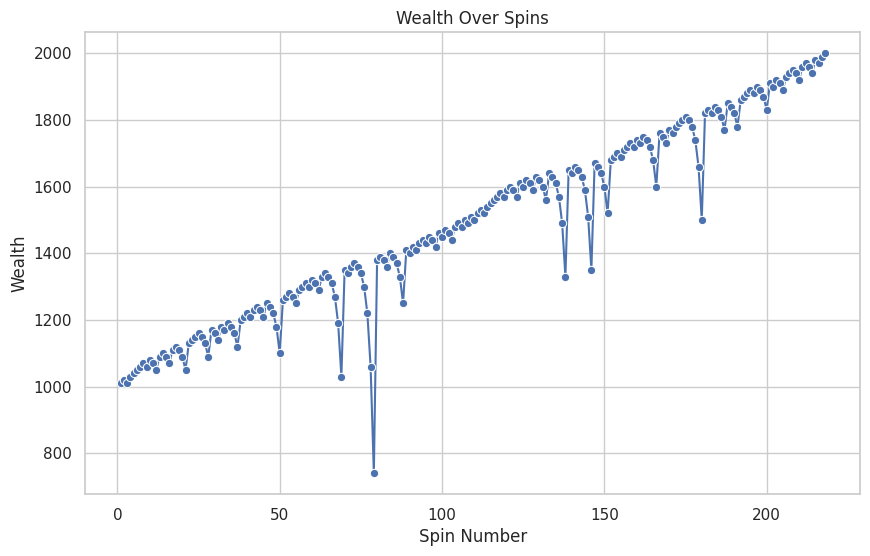

In [7]:
import random 
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#defining 1 spin of roulette. For the purpose of the experiment I will only be betting red and using a European roulette system (due to its better odds at only 1 green)
#wealth will be the total amount willing to bet (i.e. if you lose more than wealth you leave the casino) and bet will be the initial bet to start with
result = ""
def spin(wealth, bet):
    rand = random.randint(1,37)
    if(rand == 1):
        color = "green"
    elif(rand%2 == 0):
        color = "black"
    else:
        color = "red"
        
    #result of the spin
    if (color == "red"):
        wealth = wealth + bet
        return wealth, "win"
    else:
        wealth = wealth - bet
        return wealth, "loss"
    

#A repeated simulation that will end when the user goes broke or doubles their wealth

def repeated_games(wealth, bet):
    double = wealth*2 #create the target value to hit
    initial = bet #hold a stable value to return to after a win
    history = []  # To store the tracking data
    
    while(0<wealth<double): #repeat until wealth is doubled or user goes broke
        if bet > wealth:  # Stop if the bet exceeds current wealth
            return pd.DataFrame(history)
        wealth, result = spin(wealth, bet)
        history.append({"Spin": len(history) + 1, "Wealth": wealth, "Bet": bet, "Result": result})
        if (result == "loss"):
            bet = bet*2
        else:
            bet = initial
    return pd.DataFrame(history)


data = repeated_games(1000, 10)

# Visualize the wealth over time
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Spin", y="Wealth", marker="o")
plt.title("Wealth Over Spins")
plt.xlabel("Spin Number")
plt.ylabel("Wealth")
plt.show()

In [3]:
def repeated_games(wealth, bet):
    double = wealth * 2  # create the target value to hit
    initial = bet  # hold a stable value to return to after a win
    history = []  # To store the tracking data
    
    while(0 < wealth < double):  # repeat until wealth is doubled or user goes broke
        if bet > wealth:  # Stop if the bet exceeds current wealth
            return history, wealth >= double
        wealth, result = spin(wealth, bet)
        history.append({"Spin": len(history) + 1, "Wealth": wealth, "Bet": bet, "Result": result})
        if (result == "loss"):
            bet = bet * 2
        else:
            bet = initial
    return history, wealth >= double


# Run 1,000 simulations
num_simulations = 10000
initial_wealth = 1000
initial_bet = 10
success_count = 0
spins_in_success = []

for _ in range(num_simulations):
    game_data, success = repeated_games(initial_wealth, initial_bet)
    if success:
        success_count += 1
        spins_in_success.append(len(game_data))  # Record the number of spins

# Calculate statistics
average_spins = sum(spins_in_success) / success_count if success_count else 0

# Display results
print(f"Total simulations: {num_simulations}")
print(f"Simulations that doubled wealth: {success_count}")
print(f"Average number of spins for successful simulations: {average_spins:.2f}")  # .2f rounds it to 2 decimals


Total simulations: 10000
Simulations that doubled wealth: 3030
Average number of spins for successful simulations: 197.99
